Name: Harshith Akkapelli

Dataset Link: [Mushroom Classification](https://www.kaggle.com/datasets/uciml/mushroom-classification)

Task: SEMMA

**Step-1: Sample**

Objective: Get an understanding of the dataset, its size, and its features.
Tasks:
Load the dataset.
Get a quick overview of the data.
Understand the distribution of target classes.

In [ ]:
"""Mount Google Drive to access your data"""
from google.colab import drive #Import library
drive.mount('/content/drive') #Mount it
import pandas as pd
# Load the entire dataset
url = '/content/drive/MyDrive/mushrooms.csv'
mushrooms = pd.read_csv(url)

# Display the first few rows of the dataset
overview = mushrooms.head()

# Get the shape of the dataset
shape = mushrooms.shape

# Get the distribution of the target classes
class_distribution = mushrooms['class'].value_counts()

overview, shape, class_distribution

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
 0     p         x           s         n       t    p               f   
 1     e         x           s         y       t    a               f   
 2     e         b           s         w       t    l               f   
 3     p         x           y         w       t    p               f   
 4     e         x           s         g       f    n               f   
 
   gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
 0            c         n          k  ...                        s   
 1            c         b          k  ...                        s   
 2            c         b          n  ...                        s   
 3            c         n          n  ...                        s   
 4            w         b          k  ...                        s   
 
   stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
 0                      w                      w         p       

In [ ]:
from sklearn.model_selection import train_test_split

# Stratified sampling to get a representative sample
_, sample_data = train_test_split(mushrooms, test_size=0.10, stratify=mushrooms['class'], random_state=42)

# Get the shape of the sampled dataset
sample_shape = sample_data.shape

# Get the distribution of the target classes in the sampled dataset
sample_class_distribution = sample_data['class'].value_counts()

**Step-2: Explore Step**

Understand the characteristics of the sampled data.
Check for missing values.
Visualize the distribution of features.
Explore relationships between features and the target variable.


In [ ]:
# Check for missing values in the sampled data
missing_values = sample_data.isnull().sum()

# Display features with missing values (if any)
features_with_missing = missing_values[missing_values > 0]

features_with_missing


Series([], dtype: int64)

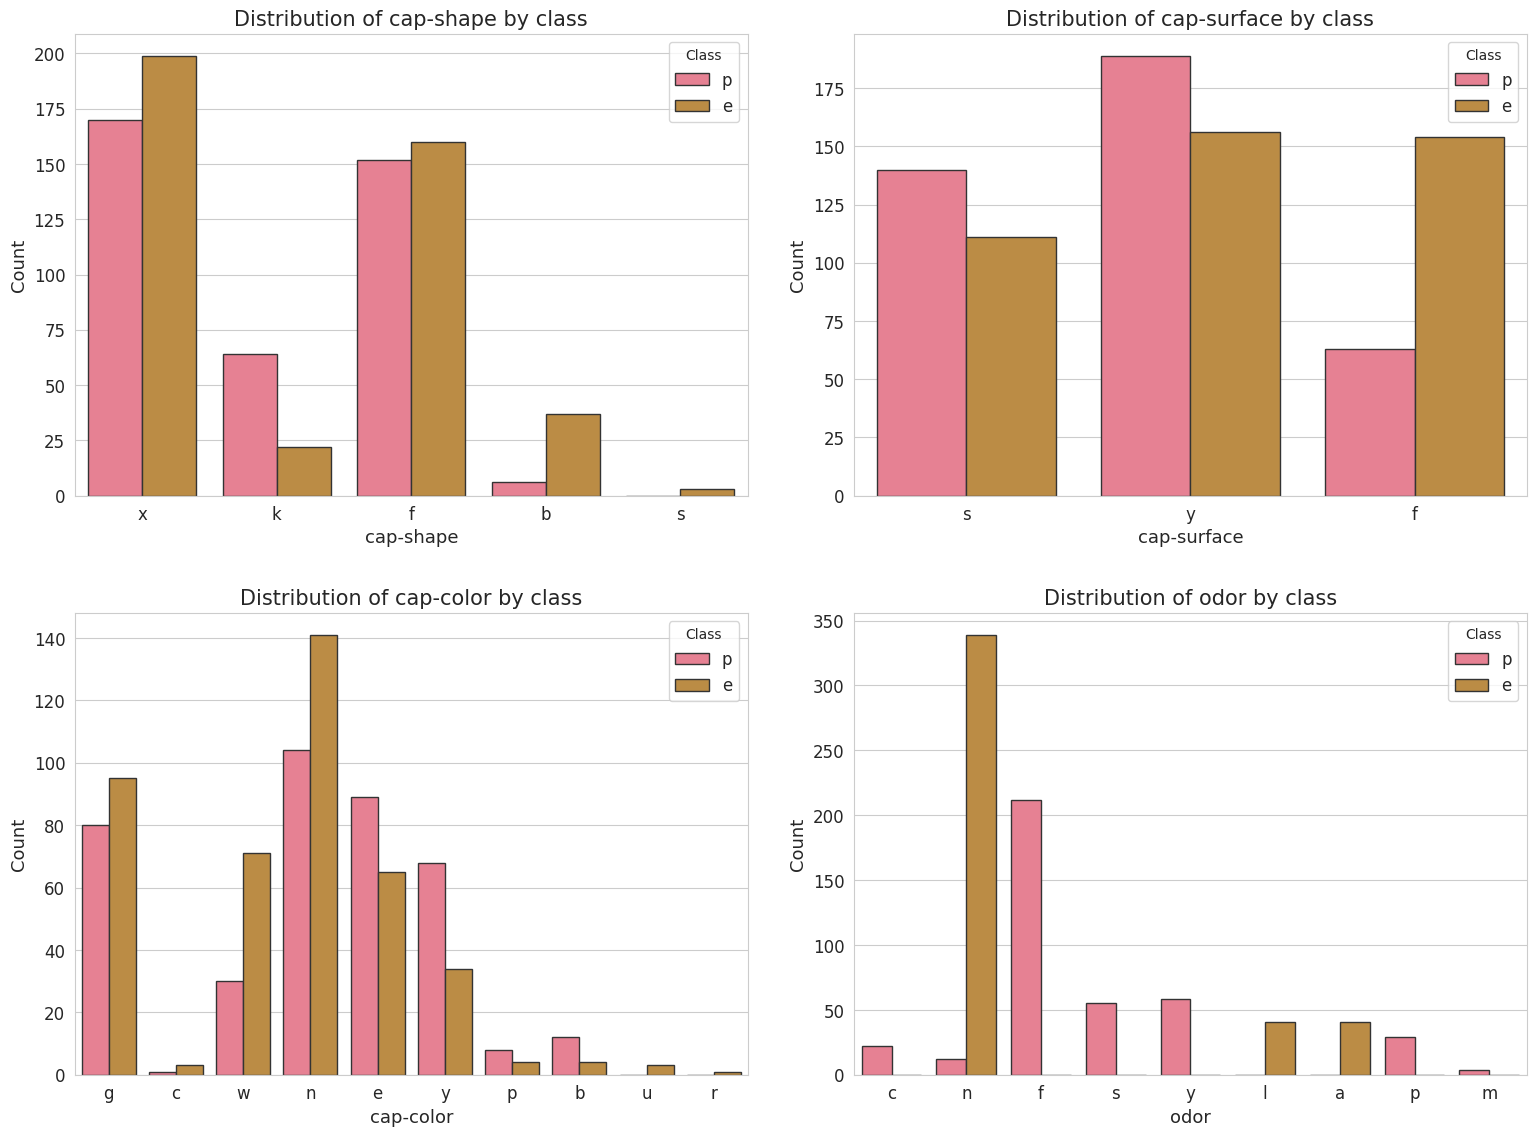

In [ ]:
# Set up a colorful palette and style
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 8)

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot the distribution of each feature in relation to the target variable
for i, feature in enumerate(features_to_visualize):
    row = i // 2
    col = i % 2
    sns.countplot(data=sample_data, x=feature, hue='class', ax=axes[row, col], palette=palette, edgecolor=".2")
    axes[row, col].set_title(f'Distribution of {feature} by class', fontsize=15)
    axes[row, col].set_ylabel('Count', fontsize=13)
    axes[row, col].set_xlabel(feature, fontsize=13)
    axes[row, col].legend(title='Class', fontsize=12)
    axes[row, col].tick_params(labelsize=12)

# Make the layout even tighter and more aesthetically pleasing
plt.tight_layout(pad=3.0)
plt.show()



**Step-3: Modify**

Prepare the data for modeling.
Handle categorical variables by converting them into a format suitable for modeling.
Split the data into training and test sets.

In [ ]:
# One-hot encode the categorical variables
encoded_data = pd.get_dummies(sample_data, drop_first=True)

# Display the shape and first few rows of the encoded data
encoded_shape = encoded_data.shape
encoded_overview = encoded_data.head()

encoded_shape, encoded_overview


((813, 94),
       class_p  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
 4499        1            0            0            0            1   
 5122        0            0            1            0            0   
 3232        1            0            0            0            1   
 2807        0            0            0            0            1   
 7356        1            1            0            0            0   
 
       cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  cap-color_g  \
 4499              1              0            0            0            1   
 5122              0              1            1            0            0   
 3232              1              0            0            0            0   
 2807              0              1            0            0            0   
 7356              1              0            0            1            0   
 
       ...  population_n  population_s  population_v  population_y  habitat_g  \
 4499  ...     

In [ ]:
# Split the encoded data into training and test sets
X = encoded_data.drop('class_p', axis=1)
y = encoded_data['class_p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the shapes of the training and test sets
train_shape = (X_train.shape, y_train.shape)
test_shape = (X_test.shape, y_test.shape)

train_shape, test_shape


(((650, 93), (650,)), ((163, 93), (163,)))

**Step-4: Model**

Train various machine learning models on the training data.
Validate the performance of each model on the test data.
Visualize the results for better interpretation.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Train an SVM model with RBF kernel
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
svm_preds = svm.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_preds)
# Re-evaluate the SVM model
svm_report = classification_report(y_test, svm_preds, target_names=['Edible', 'Poisonous'])

svm_accuracy, svm_report


(1.0,
 '              precision    recall  f1-score   support\n\n      Edible       1.00      1.00      1.00        84\n   Poisonous       1.00      1.00      1.00        79\n\n    accuracy                           1.00       163\n   macro avg       1.00      1.00      1.00       163\nweighted avg       1.00      1.00      1.00       163\n')

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train a simple feed-forward neural network
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)

# Predict on the test set
nn_preds = nn.predict(X_test)

# Evaluate the Neural Network model
nn_accuracy = accuracy_score(y_test, nn_preds)
nn_report = classification_report(y_test, nn_preds, target_names=['Edible', 'Poisonous'])

nn_accuracy, nn_report


(1.0,
 '              precision    recall  f1-score   support\n\n      Edible       1.00      1.00      1.00        84\n   Poisonous       1.00      1.00      1.00        79\n\n    accuracy                           1.00       163\n   macro avg       1.00      1.00      1.00       163\nweighted avg       1.00      1.00      1.00       163\n')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest with balanced class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
rf_preds = rf.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds, target_names=['Edible', 'Poisonous'])

rf_accuracy, rf_report


(1.0,
 '              precision    recall  f1-score   support\n\n      Edible       1.00      1.00      1.00        84\n   Poisonous       1.00      1.00      1.00        79\n\n    accuracy                           1.00       163\n   macro avg       1.00      1.00      1.00       163\nweighted avg       1.00      1.00      1.00       163\n')

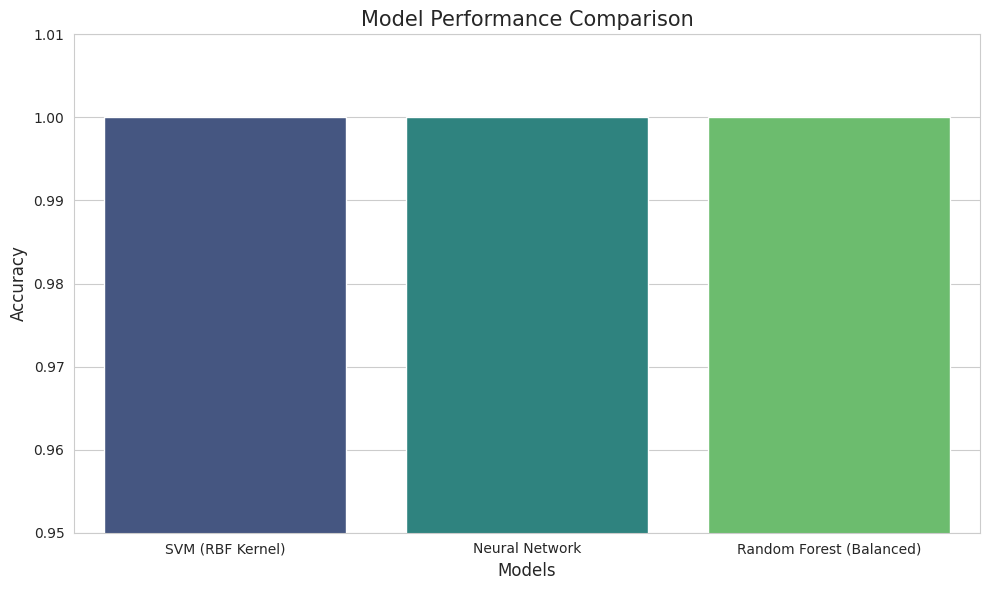

In [ ]:
# Model names and their accuracies
models = ["SVM (RBF Kernel)", "Neural Network", "Random Forest (Balanced)"]
accuracies = [svm_accuracy, nn_accuracy, rf_accuracy]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylim(0.95, 1.01)
plt.title("Model Performance Comparison", fontsize=15)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.tight_layout()



plt.show()



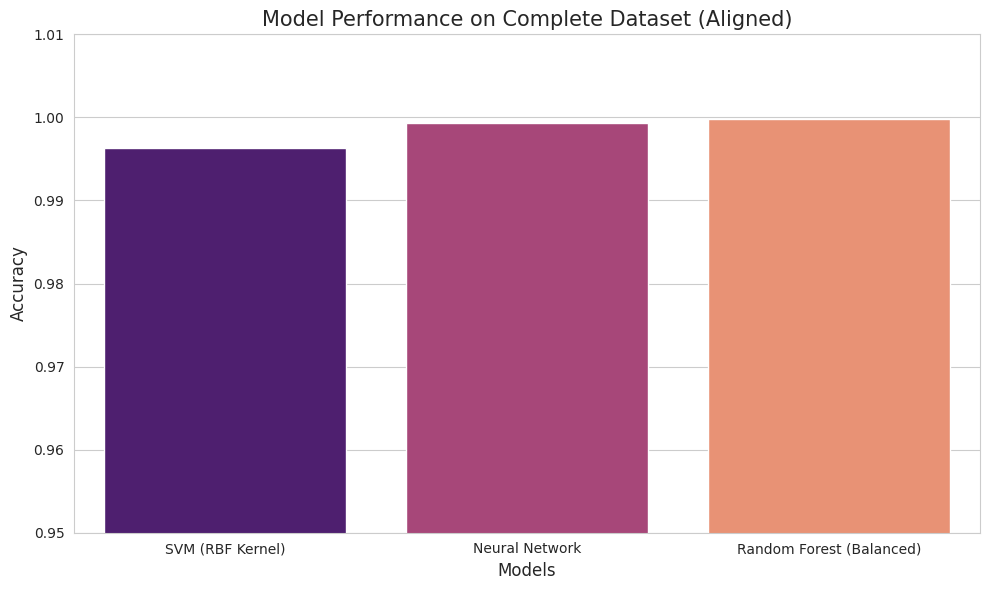

In [ ]:

# One-hot encode the complete dataset
encoded_complete_data = pd.get_dummies(mushrooms, drop_first=True)

# Split the complete dataset into features and target
X_complete = encoded_complete_data.drop('class_p', axis=1)
y_complete = encoded_complete_data['class_p']
# Ensure the complete dataset has the same columns as the sampled encoded data
X_complete_aligned = X_complete.reindex(columns=X_train.columns, fill_value=0)

# Predict using each model on the aligned complete dataset
svm_preds_complete = svm.predict(X_complete_aligned)
nn_preds_complete = nn.predict(X_complete_aligned)
rf_preds_complete = rf.predict(X_complete_aligned)
models_complete = ["SVM (RBF Kernel)", "Neural Network", "Random Forest (Balanced)"]

# Evaluate accuracies on the aligned complete dataset
svm_accuracy_complete = accuracy_score(y_complete, svm_preds_complete)
nn_accuracy_complete = accuracy_score(y_complete, nn_preds_complete)
rf_accuracy_complete = accuracy_score(y_complete, rf_preds_complete)
accuracies_complete = [svm_accuracy_complete, nn_accuracy_complete, rf_accuracy_complete]

# Plotting the accuracies for the aligned complete dataset
plt.figure(figsize=(10, 6))
sns.barplot(x=models_complete, y=accuracies_complete, palette="magma")
plt.ylim(0.95, 1.01)
plt.title("Model Performance on Complete Dataset (Aligned)", fontsize=15)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.tight_layout()

# Save the plot for download

plt.show()



**Step-5: Assess Step**

Interpret the results and the importance of features.
Identify any potential areas of concern or improvement.
Provide recommendations based on the models' findings.
To begin, let's assess the feature importances. Feature importance provides insight into which features are most influential in making predictions. Understanding these can give us insights into what characteristics are most indicative of a mushroom's edibility or toxicity.

We'll start by extracting the feature importances from the Random Forest model, as tree-based models like Random Forest naturally provide feature importance scores.



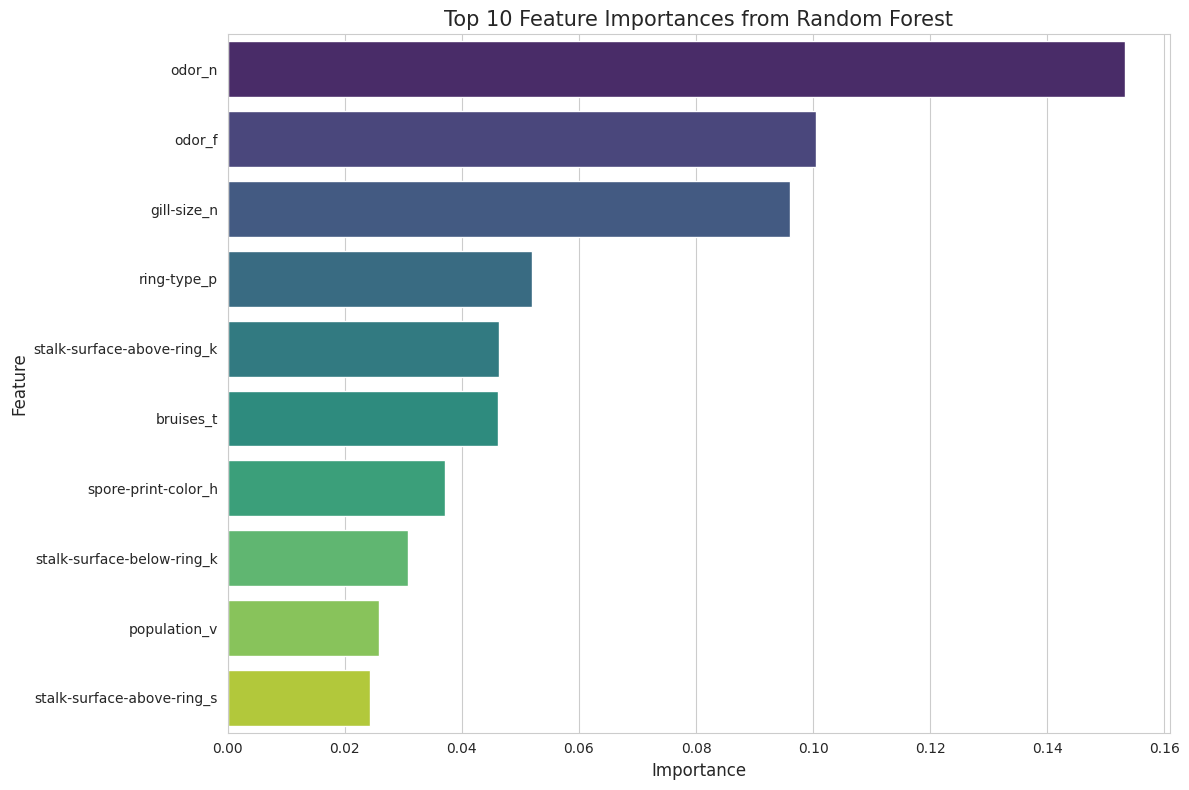

In [ ]:
# Extract feature importances from the Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance and take the top 10
top_features = features_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=top_features, y='Feature', x='Importance', palette="viridis")
plt.title("Top 10 Feature Importances from Random Forest", fontsize=15)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()



plt.show()
